# Lending Environment Simulation Model & Lender Evaluation Tool

# Data Exploration

In [72]:
import glob
import os
import numpy as np
import pandas as pd
import category_maps as maps
import dictionaries as dc
import data_processor as preproc
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


input_path = "../../data/processed/clean_data.csv"
paths = glob.glob(input_path)
len(paths)

1

In [73]:
# read all *.csv files from the input path
# drop the headers and replace them with the sequential numbers 
#df = pd.concat([pd.read_csv(f,names=range(0,38),header=0,low_memory=False) for f in paths],ignore_index = True)
#df.shape,df.columns
    

In [74]:
df = pd.read_csv(input_path)
df.describe()

,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,credit_score,credit_score_category,lender_score,lender_score_category
count,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000,29383.000000
mean,1.690195,2.068577,1.901201,2.156791,1.799136,1.822653,1.827349,1.655821,1.988769,3.676480,3.851547,2.772556,0.241772,3.594630,2.406732,2.065786,1.930164,2.385461,3.258891,3.282000,2.796583,2.711023,2.613314,1.472756,1.514651,2.655379,2.709832,2.835994,2.895143,0.295783,1.254637,1.304768,7.680972,2.189021,348.555627,1.839193,303.795052,1.744240
std,0.617315,0.613887,0.642582,0.604722,0.637219,0.630624,0.639422,0.475108,0.866650,1.173799,1.273535,1.195637,0.709064,1.928038,0.898727,0.753135,0.612274,0.968152,1.318173,1.317576,1.159101,1.099088,1.377129,0.499266,0.499794,1.058663,1.103981,1.125394,1.220304,1.083417,0.435664,0.460317,1.261708,0.584561,244.700255,0.953146,272.730673,0.818515
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-720.000000,1.000000,-590.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,8.000000,2.000000,190.000000,1.000000,140.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,0.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,8.000000,2.000000,390.000000,2.000000,380.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,5.000000,4.000000,0.000000,5.000000,3.000000,2.000000,2.000000,3.000000,5.000000,5.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,0.000000,2.000000,2.000000,8.000000,2.000000,540.000000,2.000000,500.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,7.000000,9.000000,10.000000,9.000000,4.000000,7.000000,4.000000,4.000000,3.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,6.000000,5.000000,5.000000,5.000000,8.000000,2.000000,2.000000,8.000000,4.000000,970.000000,5.000000,840.000000,5.000000


In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,credit_score,credit_score_category,lender_score,lender_score_category
0,6-23-2019 5:42:51,N24S64b12,1,1,1,2,1,1,1,1,5,2,2,2,1,3,2,2,3,3,3,2,3,4,3,1,2,2,4,3,2,1,2,1,3,2,550,2,480,2
1,6-23-2019 10:57:52,AC9S64a1,1,1,2,1,1,1,1,1,3,3,5,2,2,3,2,2,2,2,4,5,2,3,2,2,2,2,2,4,4,2,2,1,2,2,660,4,450,2
2,6-23-2019 11:59:37,D16S64a26,2,2,2,2,2,2,2,2,2,2,9,5,2,3,2,2,2,2,2,2,2,3,3,1,2,2,2,2,2,0,2,1,2,2,540,2,610,3
3,6-23-2019 20:40:41,AC9S64a2,2,1,3,1,3,2,2,2,2,6,5,4,2,3,2,2,1,2,3,3,3,3,2,2,2,2,2,4,4,0,1,1,7,2,350,1,270,1
4,6-23-2019 20:41:27,AC9S64a3,2,1,3,2,3,2,3,2,2,5,5,3,2,3,2,1,3,3,2,3,2,3,3,2,2,2,2,4,3,0,1,1,4,2,530,2,510,2


## Feature Selection

In [76]:
from sklearn.feature_selection import SelectKBest, chi2

data = df.iloc[:,2:36]  #do not include date and location
#c = pd.DataFrame.from_dict([dc.columns]).T
#columns = pd.concat([c[2:15],c[16:17],c[18:39]])
credit_score = df['credit_score_category'] 
lender_score = df['lender_score_category'] 

In [77]:
data.rename(columns=dc.columns, 
                 inplace=True)

###  Univariate Selection

#### Credit Score

In [78]:
bestfeatures = SelectKBest(chi2, k="all")
fit = bestfeatures.fit(data,credit_score)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(30,'Score'))  

                                                                                                Feature        Score
20                                                              Do you receive your money back in time?  4749.095968
14                                  Over the past 3 months, how many times have you lent someone money?  1077.694415
22                                                    What's the most common use of the money you lend?   727.163027
18                                       Do you include either interest or a lending fee when you lend?   536.273308
15                                                          On average how much do you lend in general?   512.080280
16                                                      Who did you lend money to in the past 3 months?   441.736339
29                                                      What type of loans are you currently paying of?   360.285654
19                                                             D

#### Lender Score

In [79]:
bestfeatures = SelectKBest(chi2, k="all")
fit = bestfeatures.fit(data,lender_score)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(30,'Score')) 

                                                                                                Feature        Score
20                                                              Do you receive your money back in time?  6667.831316
18                                       Do you include either interest or a lending fee when you lend?  3588.478658
19                                                             Do you request guarantees when you lend?  3339.377271
14                                  Over the past 3 months, how many times have you lent someone money?  2014.330110
13                                                                                              Country   595.871957
21     Assuming that you have lent money at least ten times, how often would you get your money repaid?   555.595727
15                                                          On average how much do you lend in general?   460.156830
22                                                    What's the

### Feature Importance

#### Credit Score

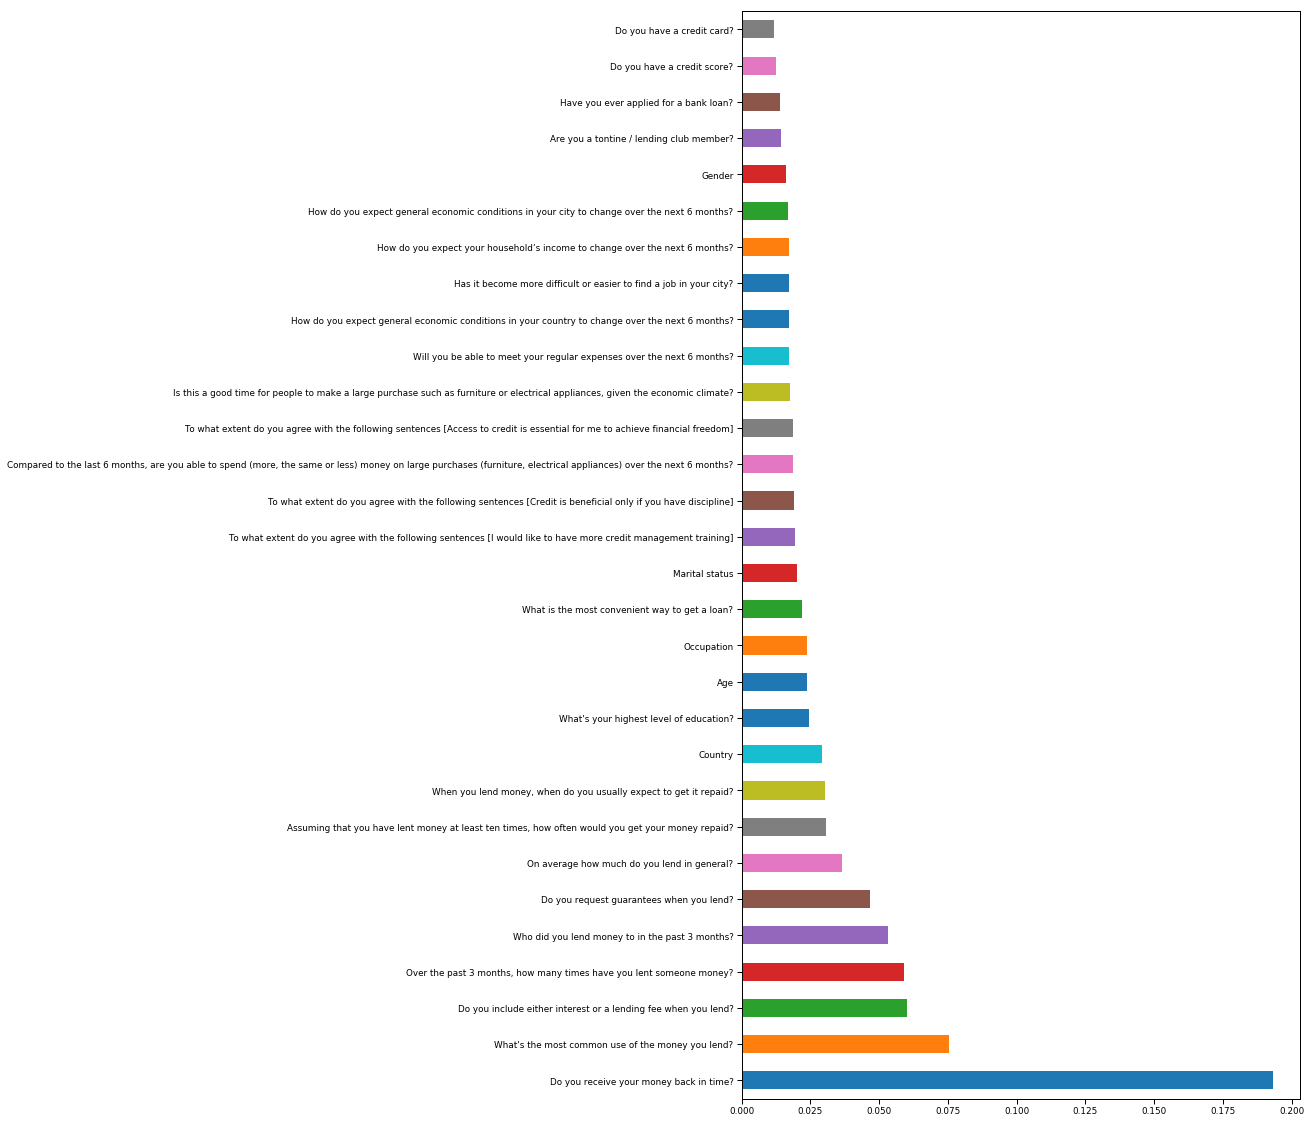

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=100)
model.fit(data,credit_score)

#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
_ = plt.figure(figsize=(10,20))
_ = feat_importances.nlargest(30).plot(kind='barh')


### Credit Score Important Features
24,26,22,18,20,23,19,21,25,16


        24  6684.282031
        22  3579.344815
        23  3308.826808
        18  2021.701786
        16   568.578714
        25   555.864421
        19   472.875751
        26   447.615584
        20   411.577992
        36   196.022728
        14   172.512950
        30   164.043637
        31   141.347621
        21   114.004620
        
**24,26,22,18,20,23,19,16,36,25**

#### Lender Score

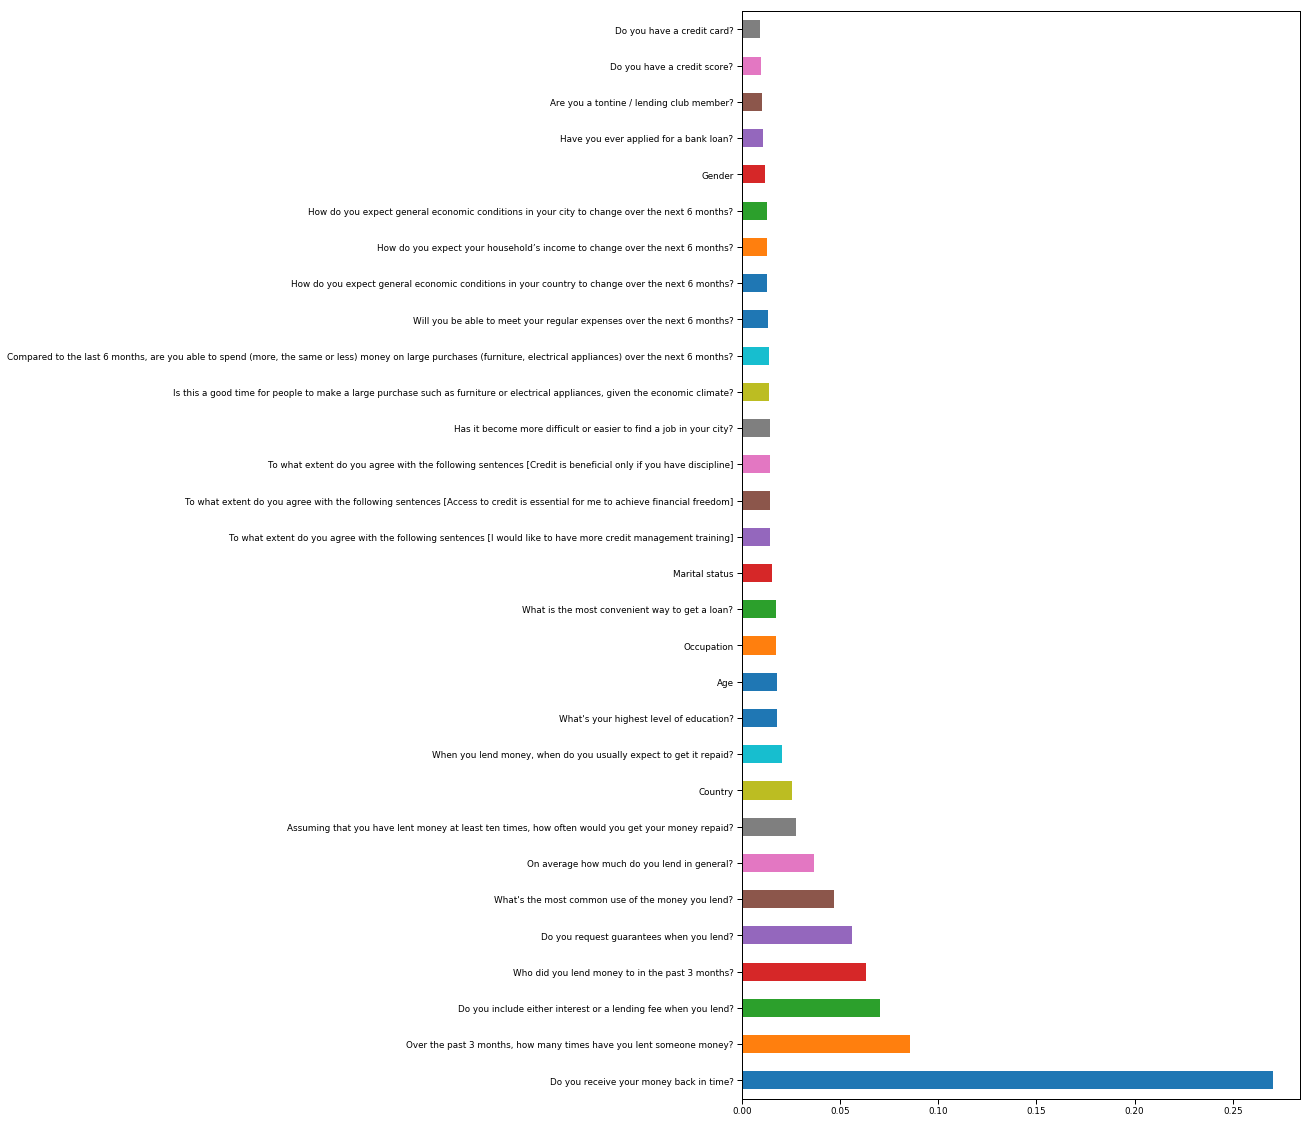

In [81]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(data,lender_score)

feat_importances = pd.Series(model.feature_importances_, index=data.columns)
_ = plt.figure(figsize=(10,20))
_ = feat_importances.nlargest(30).plot(kind='barh')


#### Lender Score Most Important Features
24,18,22,20,23,26,19,25,16

    24  6667.831316
    22  3588.478658
    23  3339.377271
    18  2014.330110
    16   595.871957
    25   555.595727
    19   460.156830
    26   444.852329
    20   415.174349
    14   174.179424
    21   112.948018
**24,18,22,23,20,26,19,25,16,14,21**

### Feature Correlation Matrix

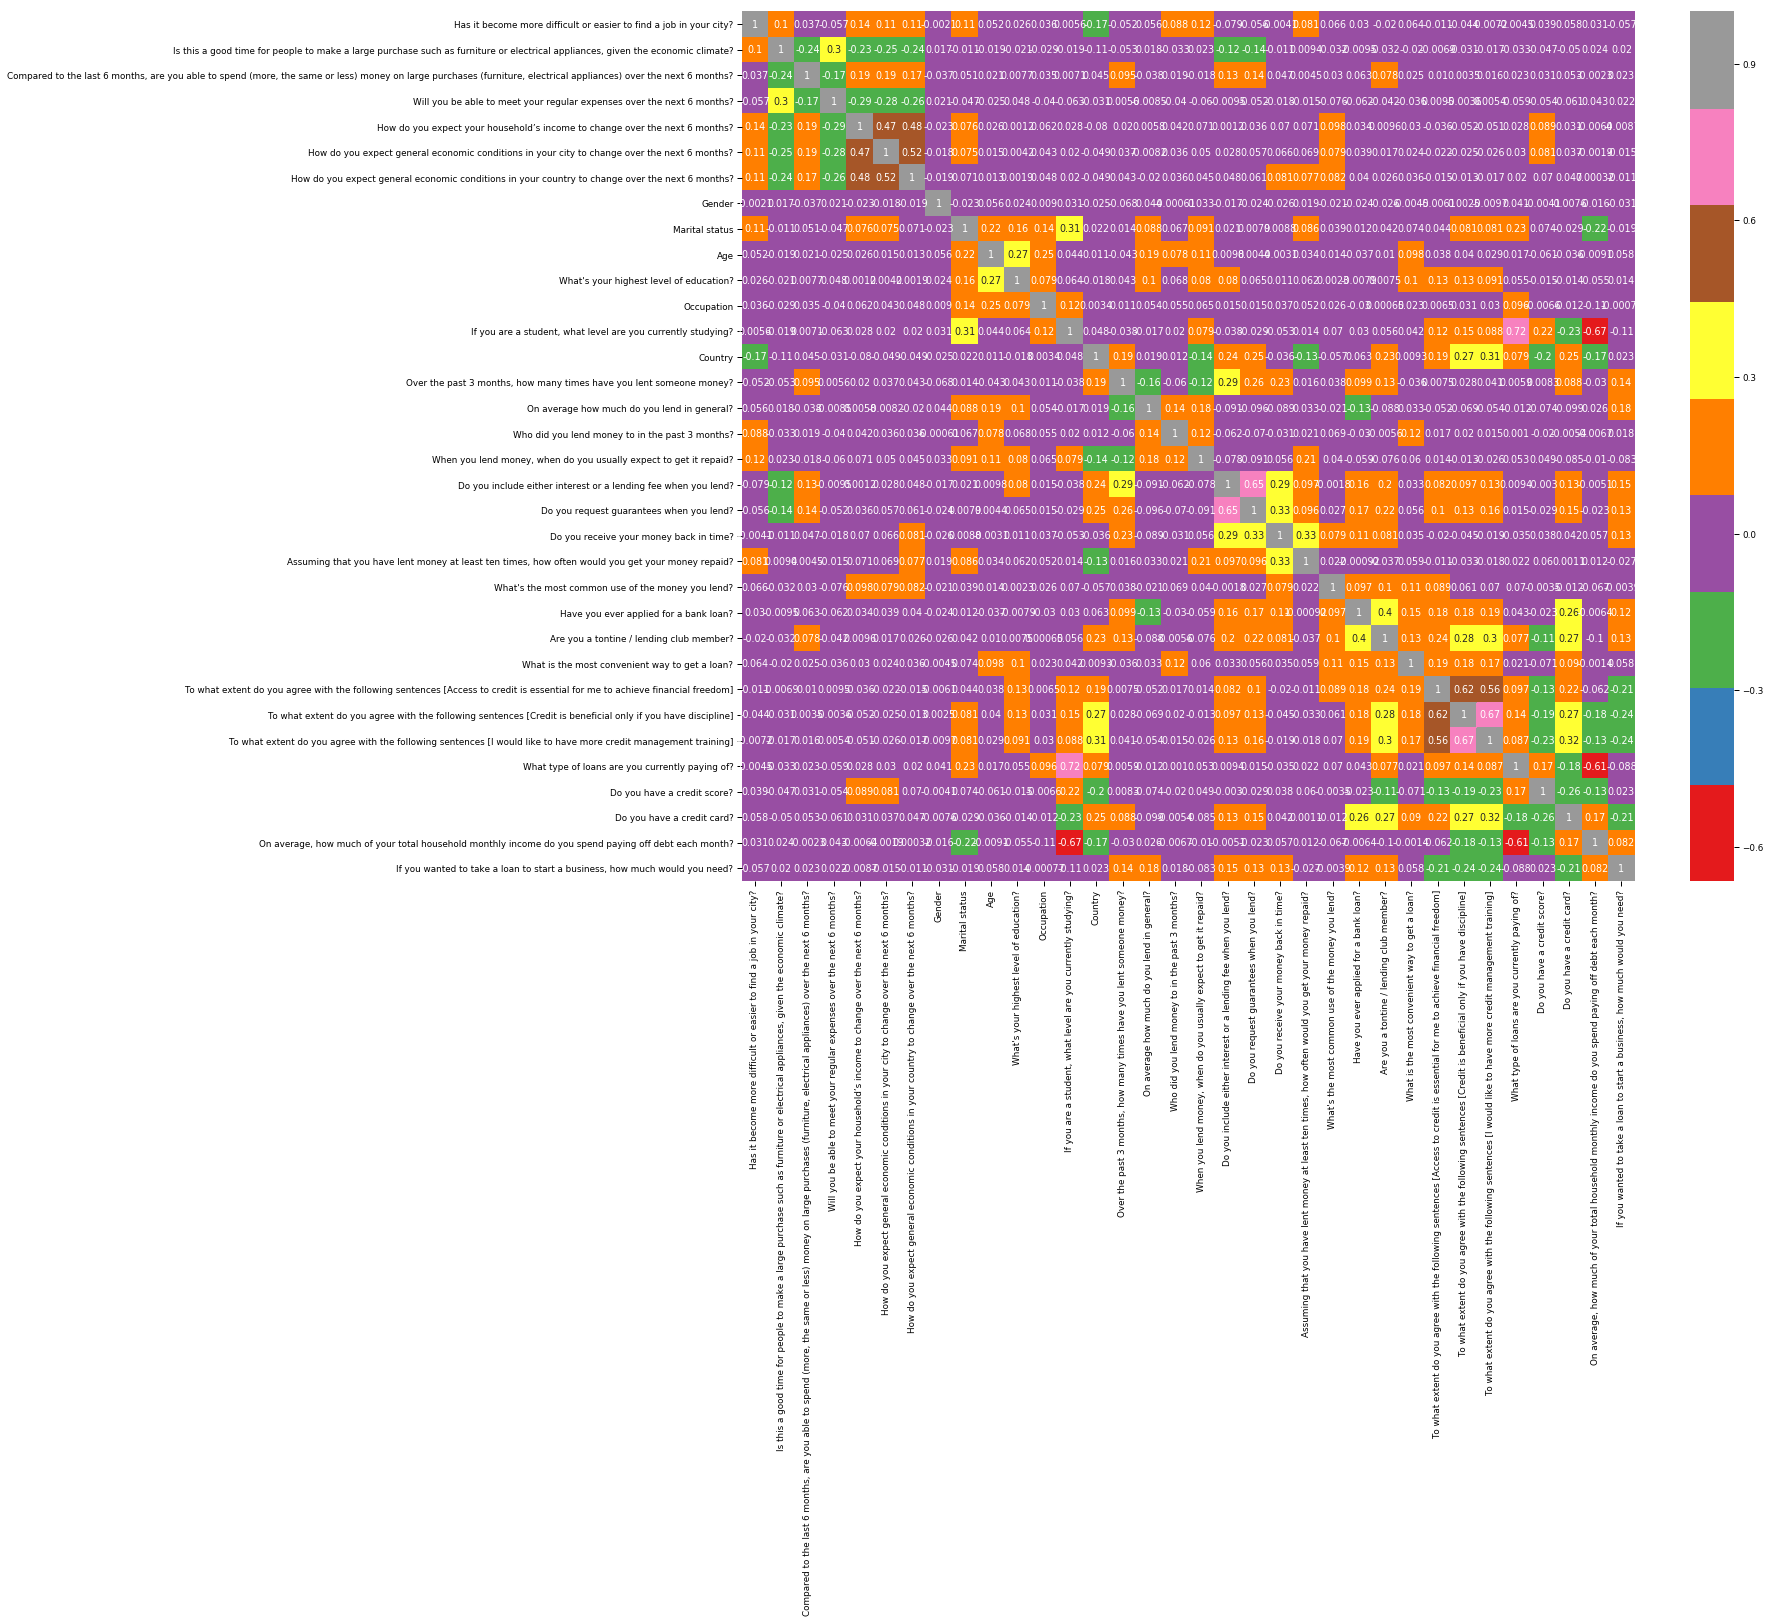

In [114]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='Set1')

## Dataset Balance

### Credit Score Categories

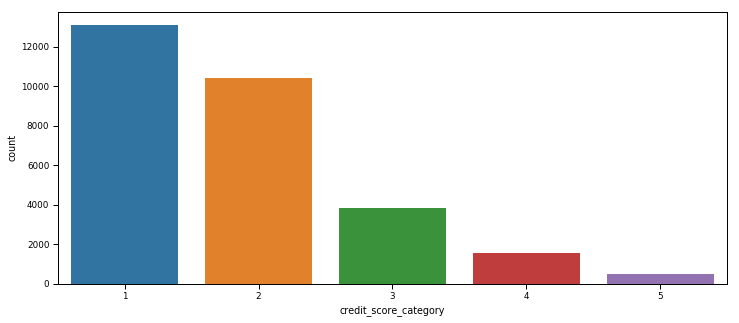

In [83]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['credit_score_category'], log=False);

In [84]:
cameroon = df[df['16'] == 1]
cote = df[df['16'] == 2]
ghana = df[df['16'] == 3]
kenya = df[df['16'] == 4]
nigeria = df[df['16'] == 5]
south_africa = df[df['16'] == 6]
tanzania = df[df['16'] == 7]

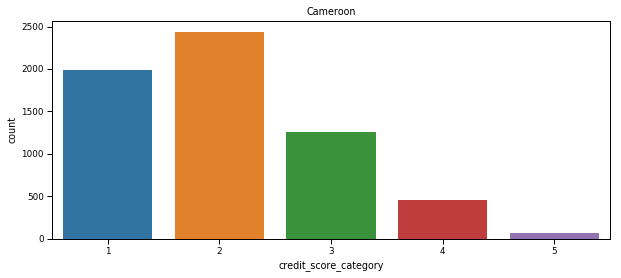

In [85]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=cameroon['credit_score_category']);
_ = plt.title("Cameroon")

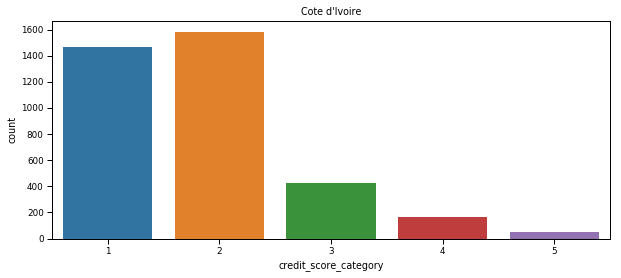

In [86]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=cote['credit_score_category']);
_ = plt.title("Cote d'Ivoire")

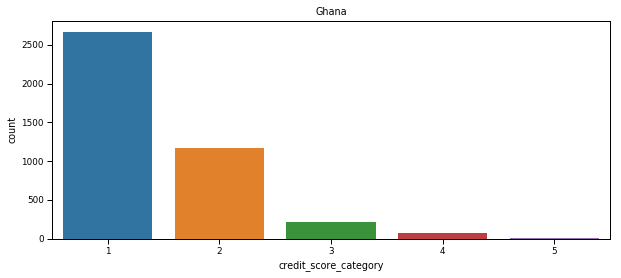

In [87]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=ghana['credit_score_category']);
_ = plt.title("Ghana")

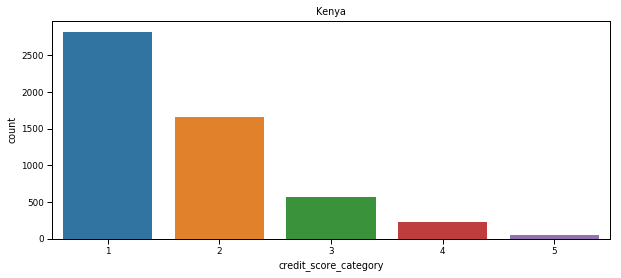

In [88]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=kenya['credit_score_category']);
_ = plt.title("Kenya")

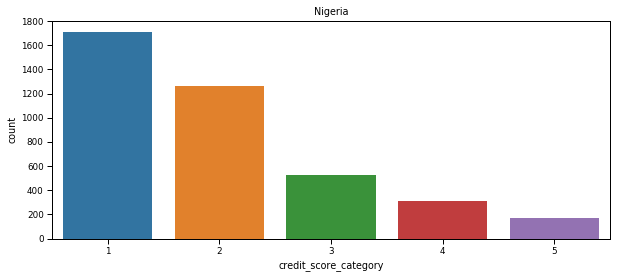

In [89]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=nigeria['credit_score_category']);
_ = plt.title("Nigeria")

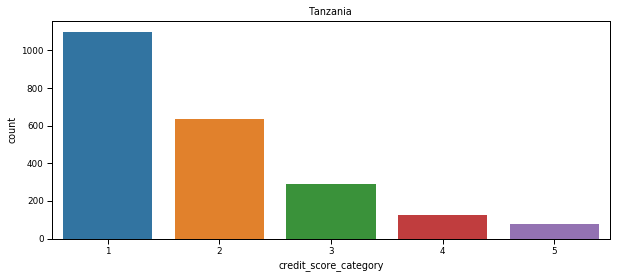

In [90]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=tanzania['credit_score_category']);
_ = plt.title("Tanzania")

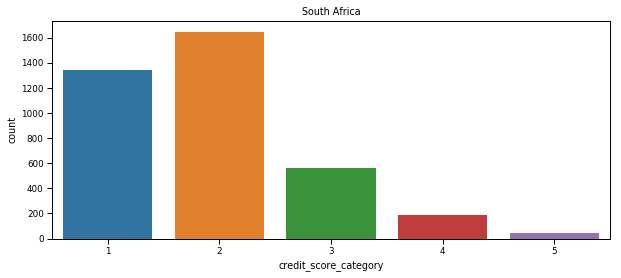

In [91]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x=south_africa['credit_score_category']);
_ = plt.title("South Africa")

### Lender Score Categories

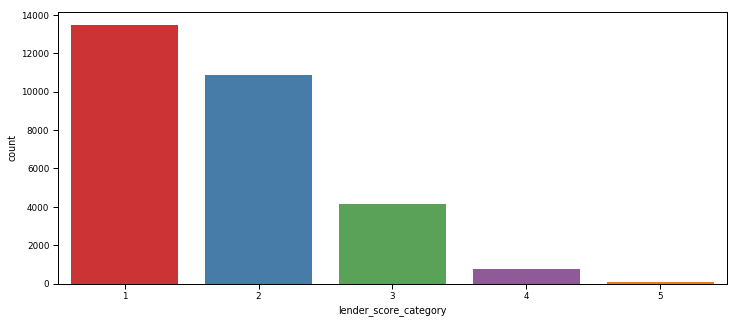

In [115]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['lender_score_category'], log=False, palette='Set1')

### This is for information olny. Do not include into the report

In [93]:
negative_score = df[df['credit_score'] <0]
negative_score.shape[0]/df.shape[0]


0.1022359867950856

In [94]:
negative_score = df[df['lender_score'] <0]
negative_score.shape[0]/df.shape[0]

0.1555661436885274

### Final data preparation. Take important features. Do upsampling.

In [95]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
## credit score datasets
cs_data = df[['24','26','22','18','20','23','19','16','36','25']]
credit_score = df['credit_score_category'] 

# lender score dataset
ls_data = df[['24','18','22','23','20','26','19','25','16','12','11','21']] #,'11','21'
lender_score = df['lender_score_category'] 
cs_data.shape, credit_score.shape,ls_data.shape, lender_score.shape

((29383, 10), (29383,), (29383, 12), (29383,))

In [96]:
cs_data.head()

,24,26,22,18,20,23,19,16,36,25
0,3,3,3,2,3,2,2,3,3,4
1,2,2,4,2,2,5,2,3,2,3
2,2,3,2,2,2,2,2,3,2,3
3,3,2,3,2,1,3,2,3,7,3
4,2,3,2,2,3,3,1,3,4,3


In [97]:
ls_data.head()

,24,18,22,23,20,26,19,25,16,12,11,21
0,3,2,3,2,3,3,2,4,3,2,2,3
1,2,2,4,5,2,2,2,3,3,5,3,2
2,2,2,2,2,2,3,2,3,3,9,2,2
3,3,2,3,3,1,2,2,3,3,5,6,2
4,2,2,2,3,3,3,1,3,3,5,5,3


In [98]:
# split to train/test 70/30

train_cs, test_cs, train_cs_class, test_cs_class = train_test_split(cs_data, credit_score, test_size=0.3)
train_ls, test_ls, train_ls_class, test_ls_class = train_test_split(ls_data, lender_score, test_size=0.3)
train_cs.shape, train_cs_class.shape,train_ls.shape, train_ls_class.shape

((20568, 10), (20568,), (20568, 12), (20568,))

In [99]:

# usample both training sets
train_u_cs, train_u_cs_class = SMOTE().fit_resample(train_cs, train_cs_class)
train_u_ls, train_u_ls_class = SMOTE().fit_resample(train_ls, train_ls_class)

train_u_cs.shape, train_u_cs_class.shape,train_u_ls.shape, train_u_ls_class.shape

((45910, 10), (45910,), (47205, 12), (47205,))

In [100]:
# downsample the training sets
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
train_d_cs, train_d_cs_class = rus.fit_resample(train_cs, train_cs_class)
train_d_ls, train_d_ls_class = rus.fit_resample(train_ls, train_ls_class)

train_d_cs.shape, train_d_cs_class.shape,train_d_ls.shape, train_d_ls_class.shape

((1600, 10), (1600,), (350, 12), (350,))

### Upsampled Credit Score Categories of Training Set 

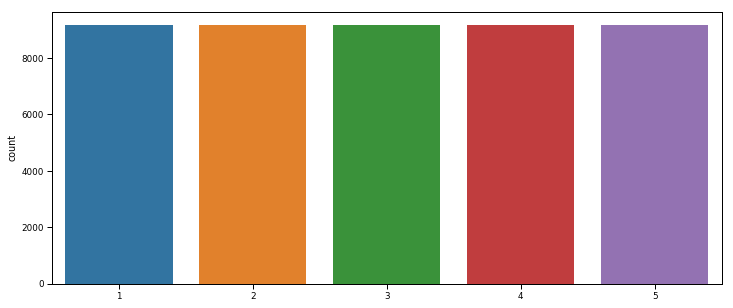

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x=train_u_cs_class, log=False);

### Upsmapled Lender Score Categories of Training set

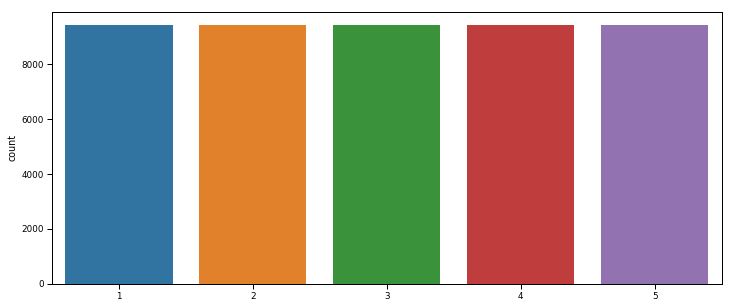

In [102]:
plt.figure(figsize=(12,5))
sns.countplot(x=train_u_ls_class, log=False);

### Downsampled Credit Score Categories of Training Set 

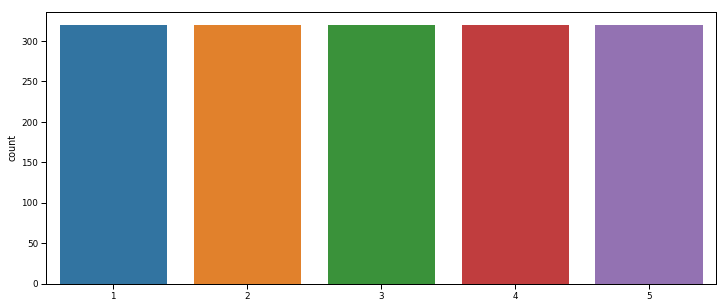

In [103]:
plt.figure(figsize=(12,5))
sns.countplot(x=train_d_cs_class, log=False);

### Downsmapled Lender Score Categories of Training set

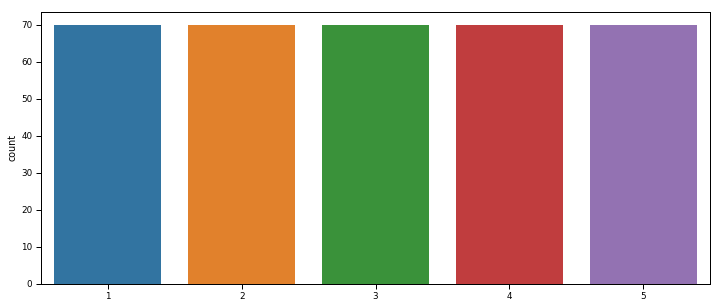

In [104]:
plt.figure(figsize=(12,5))
sns.countplot(x=train_d_ls_class, log=False);

## Model Training

In [105]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV 
width = 8
height = 6.5

### Credit Score Model Training

#### Random Forest

Random Forest  model score: 0.9274
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      3926
           2       0.92      0.93      0.92      3072
           3       0.85      0.86      0.86      1168
           4       0.80      0.86      0.83       494
           5       0.86      0.77      0.82       155

   micro avg       0.93      0.93      0.93      8815
   macro avg       0.88      0.88      0.88      8815
weighted avg       0.93      0.93      0.93      8815



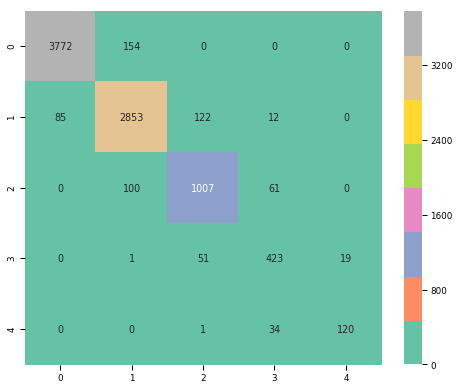

In [123]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=20)
_ = rf.fit(train_u_cs,train_u_cs_class)
rfp = rf.predict(test_cs)
print("Random Forest  model score: {:.4}".format( rf.score(test_cs,test_cs_class)))
rfcm = confusion_matrix(test_cs_class, rfp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
rfr = classification_report(test_cs_class, rfp)
print(rfr)
_= sns.heatmap(pd.DataFrame(rfcm), annot=True, fmt="d",cmap='Set2')

In [112]:
# k-fold training
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state = 4)
skf.get_n_splits(train_u_cs,train_u_cs_class)


3

In [126]:
# train 
models=[]
scores=[]
for train_index, test_index in skf.split(train_u_cs,train_u_cs_class):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_u_cs[train_index], train_u_cs[test_index]
    y_train, y_test = train_u_cs_class[train_index], train_u_cs_class[test_index]
    rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    _ = rf.fit(X_train,y_train)
  #  rfp = rf.predict(X_test)
    models.append(rf)
    scores.append(rf.score(X_test,y_test))
    print("Random Forest  model score: {:.4}".format( rf.score(X_test,y_test)))
print(scores)


Random Forest  model score: 0.9451
Random Forest  model score: 0.9392
Random Forest  model score: 0.9425
[0.9451159751715126, 0.939235543939889, 0.9424836601307189]


              precision    recall  f1-score   support

           1       0.97      0.95      0.96      3926
           2       0.91      0.92      0.91      3072
           3       0.84      0.85      0.85      1168
           4       0.78      0.85      0.81       494
           5       0.85      0.77      0.81       155

   micro avg       0.92      0.92      0.92      8815
   macro avg       0.87      0.87      0.87      8815
weighted avg       0.92      0.92      0.92      8815



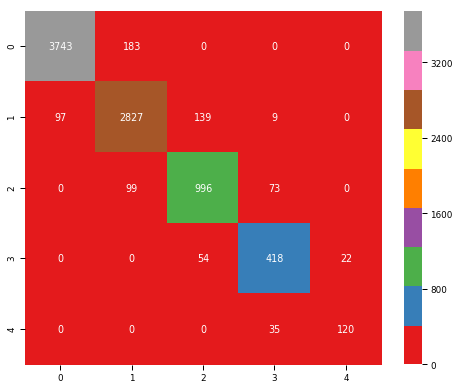

In [129]:
# winning model
idx = scores.index(max(scores))
wrf = models[idx]
rfp = wrf.predict(test_cs)
rfcm = confusion_matrix(test_cs_class, rfp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
rfr = classification_report(test_cs_class, rfp)
print(rfr)
_= sns.heatmap(pd.DataFrame(rfcm), annot=True, fmt="d",cmap='Set1')

In [45]:
# persist the random forest model
model_path = "../../models/{0}"
from joblib import dump, load
dump(rf,model_path.format("rf_simulator.model"))

['../../models/rf_simulator.model']

####  SVM

SVC  model score: 0.892
              precision    recall  f1-score   support

           1       0.97      0.93      0.95      3920
           2       0.89      0.87      0.88      3125
           3       0.75      0.84      0.79      1138
           4       0.76      0.88      0.81       480
           5       0.77      0.85      0.81       152

   micro avg       0.89      0.89      0.89      8815
   macro avg       0.83      0.87      0.85      8815
weighted avg       0.90      0.89      0.89      8815



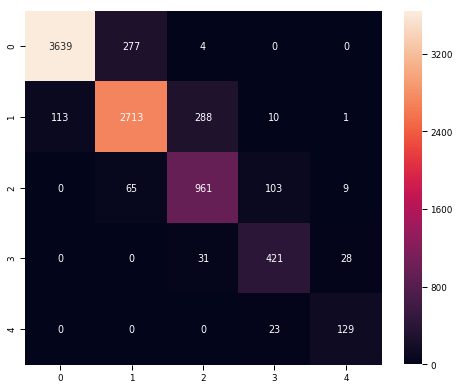

In [37]:
svc = SVC(gamma='scale')
_ = svc.fit(train_u_cs,train_u_cs_class)
svcp = svc.predict(test_cs)
print("SVC  model score: {:.4}".format( svc.score(test_cs,test_cs_class)))
svccm = confusion_matrix(test_cs_class, svcp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
svcr = classification_report(test_cs_class, svcp)
print(svcr)
_= sns.heatmap(pd.DataFrame(svccm), annot=True, fmt="d")

Random Forest  model score: 0.893
              precision    recall  f1-score   support

           1       0.98      0.93      0.96      3920
           2       0.90      0.88      0.89      3125
           3       0.74      0.80      0.77      1138
           4       0.68      0.85      0.75       480
           5       0.77      0.91      0.83       152

   micro avg       0.89      0.89      0.89      8815
   macro avg       0.81      0.88      0.84      8815
weighted avg       0.90      0.89      0.90      8815



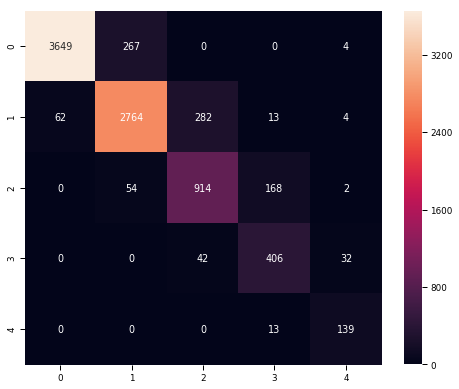

In [38]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0 )
_ = gb.fit(train_u_cs,train_u_cs_class)
gbp = gb.predict(test_cs)
print("Random Forest  model score: {:.4}".format( gb.score(test_cs,test_cs_class)))
gbcm = confusion_matrix(test_cs_class, gbp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
gbr = classification_report(test_cs_class, gbp)
print(gbr)
_= sns.heatmap(pd.DataFrame(gbcm ), annot=True, fmt="d")

### Lender Score Model Training

#### Random Forest

Random Forest  model score: 0.9644
              precision    recall  f1-score   support

           1       0.99      0.98      0.98      4024
           2       0.95      0.97      0.96      3290
           3       0.94      0.92      0.93      1271
           4       0.85      0.87      0.86       202
           5       0.88      0.50      0.64        28

   micro avg       0.96      0.96      0.96      8815
   macro avg       0.92      0.85      0.88      8815
weighted avg       0.96      0.96      0.96      8815



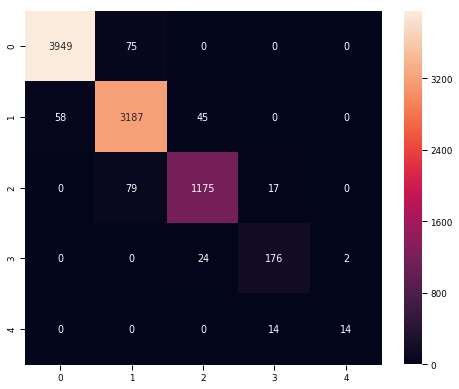

In [57]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=20)
_ = rf.fit(train_u_ls,train_u_ls_class)
rfp = rf.predict(test_ls)
print("Random Forest  model score: {:.4}".format( rf.score(test_ls,test_ls_class)))
rfcm = confusion_matrix(test_ls_class, rfp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
rfr = classification_report(test_ls_class, rfp)
print(rfr)
_= sns.heatmap(pd.DataFrame(rfcm), annot=True, fmt="d")

In [ ]:
# TAKES TIME!!!!
params = {'n_estimators':[200, 300, 400], 'min_samples_split':[20,30,40,50]}
gs = GridSearchCV( RandomForestClassifier(),params, cv=3) 
_ = gs.fit(train_u_ls,train_u_ls_class)
print("Best Random Forest model score: %0.3f" % gs.best_score_)
print("Best model hyperparameters:")
bestParams = gs.best_estimator_.get_params()
for paramName in sorted(params.keys()):
   print("\t%s: %r" % (paramName, bestParams[paramName]))

#### SVM

SVC  model score: 0.94
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      4024
           2       0.93      0.93      0.93      3290
           3       0.87      0.91      0.89      1271
           4       0.79      0.84      0.81       202
           5       0.77      0.61      0.68        28

   micro avg       0.94      0.94      0.94      8815
   macro avg       0.87      0.85      0.86      8815
weighted avg       0.94      0.94      0.94      8815



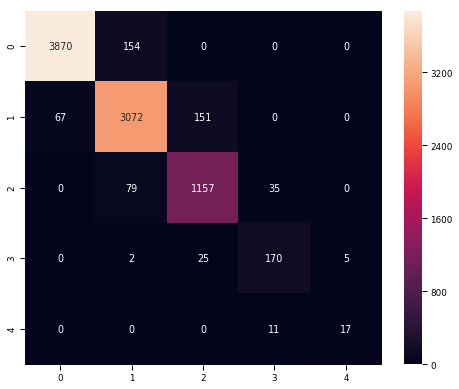

In [58]:
svc = SVC(gamma='scale')
_ = svc.fit(train_u_ls,train_u_ls_class)
svcp = svc.predict(test_ls)
print("SVC  model score: {:.4}".format( svc.score(test_ls,test_ls_class)))
svccm = confusion_matrix(test_ls_class, svcp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
svcr = classification_report(test_ls_class, svcp)
print(svcr)
_= sns.heatmap(pd.DataFrame(svccm), annot=True, fmt="d")

#### Gradient Boost

Random Forest  model score: 0.9705
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4024
           2       0.97      0.97      0.97      3290
           3       0.94      0.94      0.94      1271
           4       0.82      0.80      0.81       202
           5       0.76      0.57      0.65        28

   micro avg       0.97      0.97      0.97      8815
   macro avg       0.90      0.86      0.87      8815
weighted avg       0.97      0.97      0.97      8815



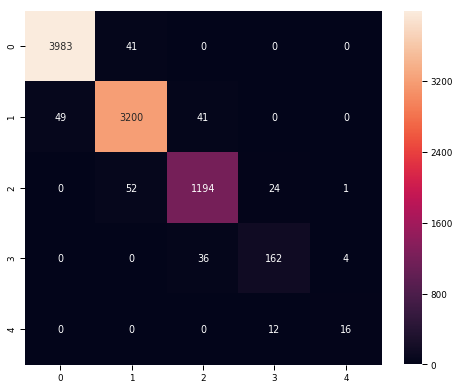

In [59]:
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=0, min_samples_split=30 )
gb_model = gb.fit(train_u_ls,train_u_ls_class)
gbp = gb.predict(test_ls)
print("Random Forest  model score: {:.4}".format( gb.score(test_ls,test_ls_class)))
gbcm = confusion_matrix(test_ls_class, gbp)
sns.set_context("paper", rc={"lines.linewidth": 1})
_ =plt.figure(figsize=(width, height))
gbr = classification_report(test_ls_class, gbp)
print(gbr)
_= sns.heatmap(pd.DataFrame(gbcm ), annot=True, fmt="d")

In [43]:
# save the model
model_path = "../../models/{0}"
from joblib import dump, load
dump(gb,model_path.format("gb_lender.model"))

['../../models/gb_lender.model']

In [ ]:
# TAKES TIME !!!
params = {'n_estimators':[200, 300 ],'learning_rate':[0.1,1.0,1.2], 'min_samples_split':[5,20,30],'max_depth':[3,6] }
gs = GridSearchCV( GradientBoostingClassifier(),params, cv=2) 
_ = gs.fit(train_u_ls,train_u_ls_class)
print("Best Random Forest model score: %0.3f" % gs.best_score_)
print("Best model hyperparameters:")
bestParams = gs.best_estimator_.get_params()
for paramName in sorted(params.keys()):
   print("\t%s: %r" % (paramName, bestParams[paramName]))

#### Learning Curves

In [ ]:
# takes time
train_sizes, train_scores, validation_scores = learning_curve(
   estimator = gb_model,X = train_ls, y = train_ls_class, cv = 3)

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
_ = plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training error')
_ = plt.plot(train_sizes, validation_scores_mean,'o-', label = 'Validation error')

_ = plt.ylabel('Error', fontsize = 14)
_ = plt.xlabel('Training set size', fontsize = 14)
_ = plt.legend()
_ = plt.ylim(1.5,0)
_ =plt.figure(figsize=(width, height))
plt.show()

## Verify Quality of the Data that are Included into  the Formula

### Risk Columns

#### Recipients


Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
Family | Family | 1 | -0.05
Friends | Friends | 2 | 0.1 
Business colleagues | Business Colleagues | 3 | 0.1 
None of the above | Other | 4 | -0.05 


In [ ]:
u=df['20'].unique() #20. Who did you lend money to in the past 3 months?
len(u),u

#### Interest


Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
Always /Toujours | Always | 1 | -0.1
Most of the time/ La moitié du temps | Most of the Time | 2 | -0.05 
About half the time/ La moitié du temps | About half the time | 3 | 0.05 
Occasionally/ Souvent | Occasionally | 4 | 0.08 
Never / Jamais | Never | 5 | 0.12 

In [ ]:
u = df['22'].unique() # 22:"Do you include either interest or a lending fee when you lend?"
len(u), u

#### Collateral


Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
Always /Toujours | Always | 1 | -0.05
Most of the time/ La moitié du temps | Most of the Time | 2 | -0.03 
About half the time/ La moitié du temps | About half the time | 3 | 0.03 
Occasionally/ Souvent | Occasionally | 4 | 0.04 
Never / Jamais | Never | 5 | 0.06 

In [ ]:
u = df['23'].unique() #23:"Do you request guarantees when you lend?"
len(u),u   

### Liquidity

#### Frequency


Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
More than 4 times / Plus de 4 foiss | More than 4 times | 1 | 0.1
Between 2-3 times / Entre 2 et 3 fois | 2-3 times | 2 | 0.07 
Once / Une fois | Once | 3 | -0.02 
Never / Jamais | Never | 4 | -0.05 


In [ ]:
u=df['18'].unique() #18:"Over the past 3 months, how many times have you lent someone money?"
len(u),u

#### Duration


Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
Less than a month / Moins d'un mois | Less tan a month | 1 | -0.01 
At least 1 month but than 3 months / 1 - 2 mois | At least 1 month but less than 3 months | 2 | 0.02 
At least 3 months but less than 6 months / 3 - 5 mois | At least 3 months but less than 6 months  | 3 | 0.03 
At least 6 months but less than 12 months / 6 - 11 mois | At least 6 months but less than 12 months | 4 | 0.04 
One year or more / Plus d'un an | One year or more | 5 | 0.05 
??? | ??? | 6 | -0.02 

In [ ]:
u=df['21'].unique() #21:"When you lend money, when do you usually expect to get it repaid?"
len(u),u

#### Amount


Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
??? | Micro | 1 | -0.05 
??? | Small | 2 | 0.03 
??? | Medium | 3 | 0.05 
??? | Large | 4 | 0.07 


In [ ]:
u=df['19'].unique() 
len(u),u

### Default

Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
Always /Toujours | Always | 1 | 0.35
Most of the time/ La moitié du temps | Most of the Time | 2 | 0.25 
About half the time/ La moitié du temps | About half the time | 3 | 0.15 
Occasionally/ Souvent | Occasionally | 4 | -0.1 
Never / Jamais | Never | 5 | -0.3 

In [ ]:
u=df['24'].unique() # 24:"Do you receive your money back in time?"
len(u),u

### Usage

Raw | Description | Categories | Weights 
--------- | -------------| ------- | ------  
Same | To cover regular expenses (Rent, clothing, home appliances, etc.) | 1 | -0.1
Same| To pay for one-time or sudden expenses (Wedding, medical emergencies, etc.) | 2 | 0.05 
Same | To invest or cover business expenses (Merchandise, salaries, etc..) | 3 | 0.15 
To pay off other debts | To pay off other debts | 4 | -0.05 
I don't know | I don't know | 5 | 0.05 

In [ ]:
u=df['26'].unique() #26:"What's the most common use of the money you lend?"
len(u),u